In [11]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

#### Read, Display and Saving

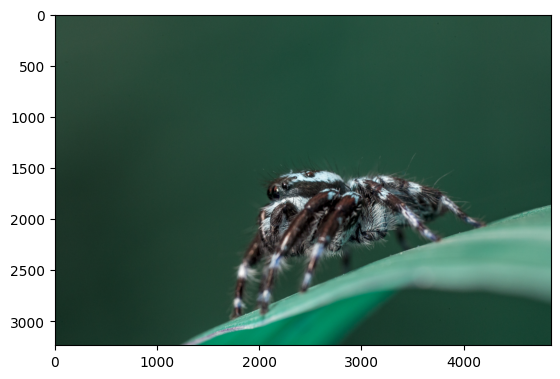

In [39]:
dir = "img03.jpeg"
img1 = cv2.imread(dir)
plt.imshow(img1)

#### Color Images

In [58]:
def swapBGR2RGB(img):
    img = img[:, :, ::-1]
    return img

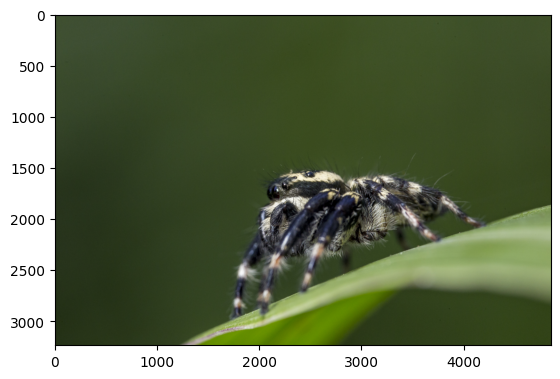

In [61]:
dir = "img03.jpeg"
img1 = swapBGR2RGB(cv2.imread(dir))
plt.imshow(img1)

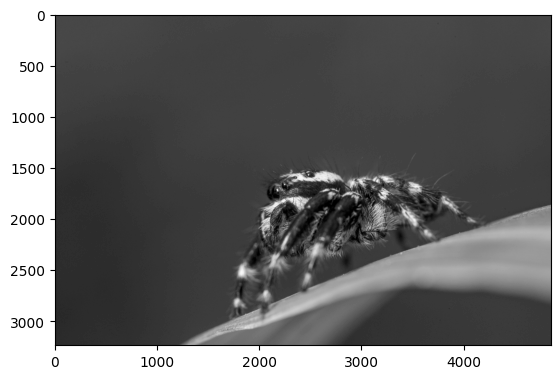

In [51]:
dir = "img03.jpeg"
img1 = cv2.imread(dir, 0)
plt.imshow(img1, cmap='gray')

#### Basic Image Manipulations

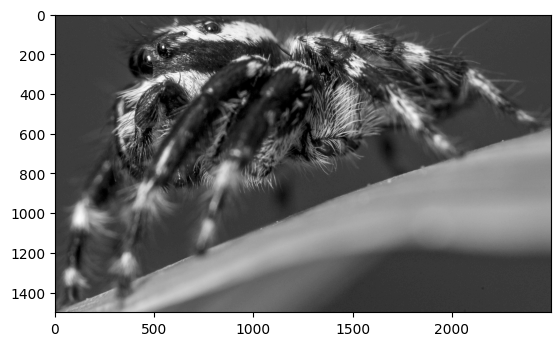

In [108]:
# Crop
img1 = cv2.imread(dir, 0)
img1 = img1[1500:3000, 1700:4200]
plt.imshow(img1, cmap='gray')

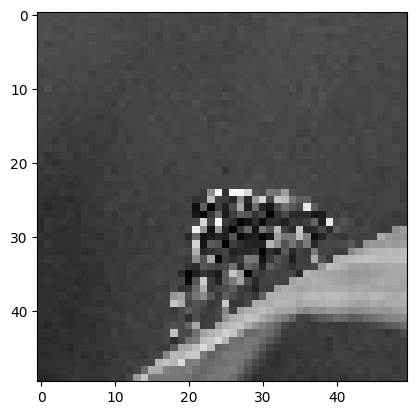

In [52]:
# Resize
img2 = cv2.resize(img1, (50, 50))
plt.imshow(img2, cmap='gray')

#### Chuyển RGB thành Grayscale

$$I'(x,y)=\frac{a.I(x,y).R + b.I(x,y).G + c.I(x,y).B}{(a + b + c)}$$

In [94]:
def grayscale(frame, n=1): # rgb
    img = np.zeros((len(frame[:]), len(frame[0][:])), dtype=np.uint8)
    for i in range(len(frame[:])):
        for j in range(len(frame[i][:])):
            r, g, b = frame[i][j][:]
            img[i][j] = round((0.299 * r + 0.587 * g + 0.114 * b)/n)
    return img

In [99]:
grayscale_img = grayscale(cv2.imread("img03.jpeg"))

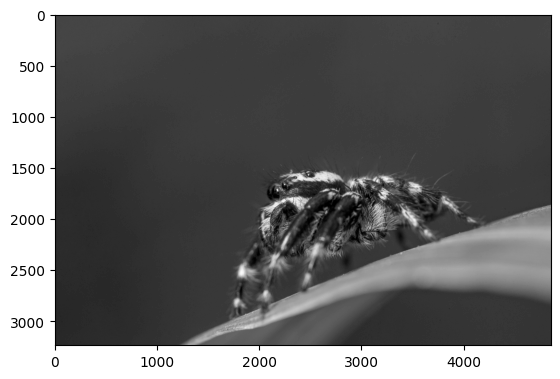

In [100]:
plt.imshow(grayscale_img, cmap='gray')

In [101]:
grayscale_img = grayscale(cv2.imread("img03.jpeg"), 100)

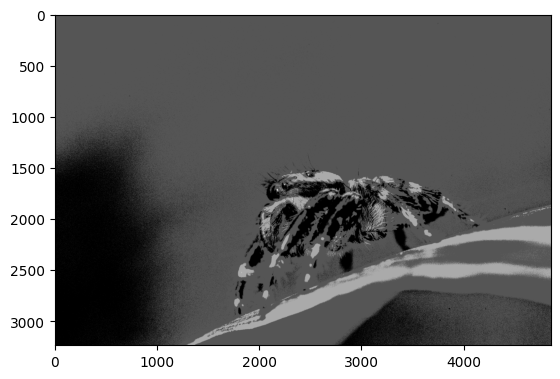

In [102]:
plt.imshow(grayscale_img, cmap='gray')

#### Tăng giảm tương phản

Sử dụng gamma để điều chỉnh tương phản
$$I'(x,y)=I(x,y)^\gamma$$
- $\gamma$ > 1: tăng
- $\gamma$ < 1: giảm
- $\gamma$ = 1: không đổi

In [88]:
def gamma_constract(img, gamma):
    img = np.power(img, gamma)
    max_val = np.max(img.ravel())
    img = img/max_val * 255
    img = img.astype(np.uint8)
    return img

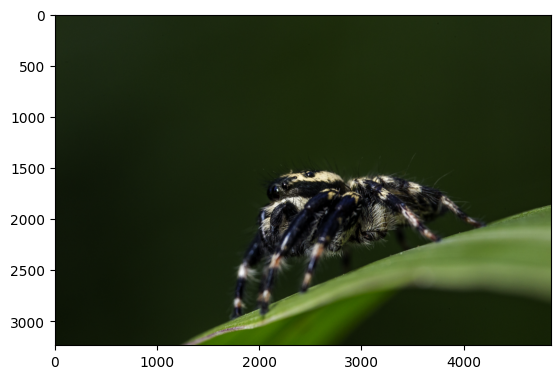

In [93]:
img = cv2.imread("img03.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = gamma_constract(img, 1.5)
plt.imshow(img)

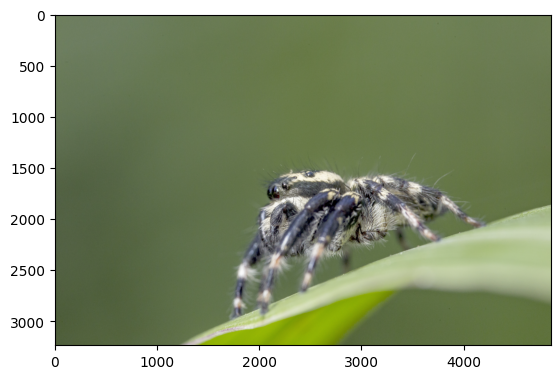

In [121]:
img = cv2.imread("img03.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = gamma_constract(img, 0.6)
plt.imshow(img)

#### Tăng giảm sáng

$$I'(x,y)= \alpha.I(x,y) + \Beta$$
- $\alpha$ > 0: tăng
- $\alpha$ < 0: giảm

In [77]:
def change_brightness(img, alpha, beta):
    img_new = np.asarray(alpha*img + beta, dtype=int) 
    img_new[img_new>255] = 255
    img_new[img_new<0] = 0
    return img_new

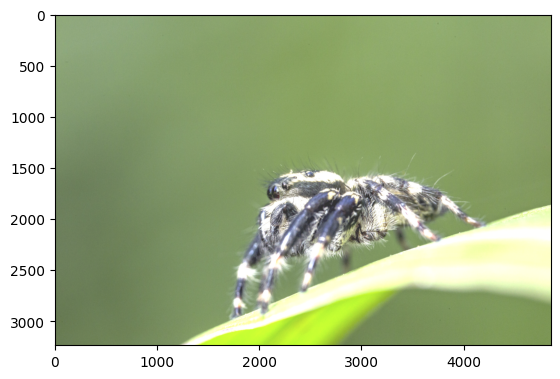

In [78]:
img = cv2.imread("img03.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = change_brightness(img, 1.5, 50)
plt.imshow(img)

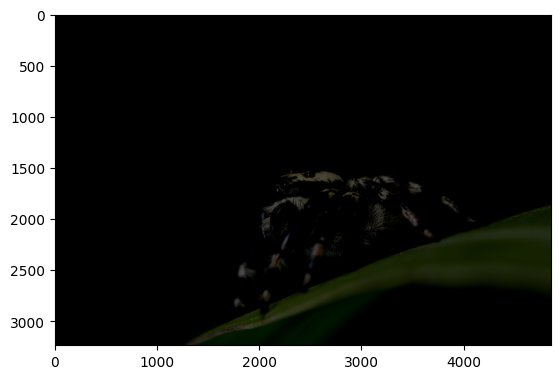

In [80]:
img = cv2.imread("img03.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = change_brightness(img, 0.5, -50)
plt.imshow(img)

#### Ảnh âm bản

$$I'(x,y) = 255 - I(x,y)$$

In [109]:
def negative(frame):
    for i in range(len(frame[:])):
        for j in range(len(frame[i][:])):
            frame[i][j] = 255 - frame[i][j] 
    return frame

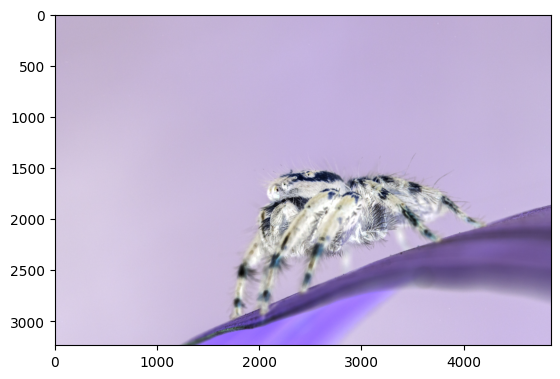

In [110]:
img = cv2.imread("img03.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = negative(img)
plt.imshow(img)

#### Tách ngưỡng

$$\begin{equation}I'(x,y) = \begin{cases}
min (\text{thường là giá trị} = 0) & \text{nếu I(x,y)} > Thresshold \\
max (\text{thường là giá trị} = 255) & \text{nếu I(x,y)} <= Thresshold \\
\end{cases}
\end{equation}$$

In [117]:
# tách ngưỡng
def threshold(img, thresshold):
    img[img>thresshold] = 255
    img[img<=thresshold] = 0
    return img

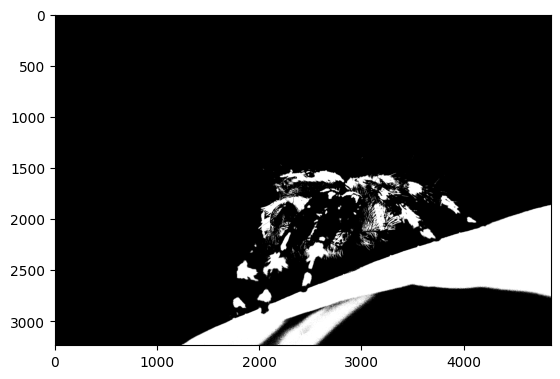

In [118]:
img = cv2.imread("img03.jpeg", 0)
img = threshold(img, 100)
plt.imshow(img, cmap='gray')

#### Tách ngưỡng tự động

In [133]:
def threshold_auto(img):
    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = cv2.Canny(img, 50, 100)
    return img

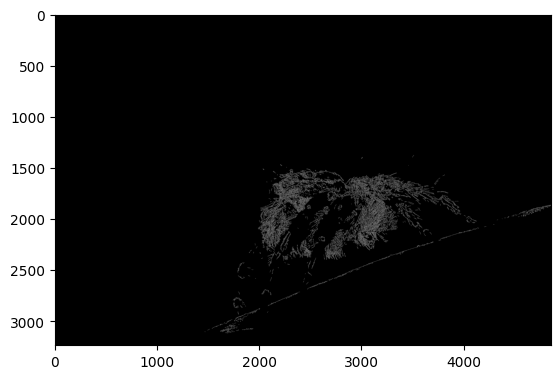

In [134]:
img = cv2.imread("img03.jpeg", 0)
img = threshold_auto(img)
plt.imshow(img, cmap='gray')